In [215]:
import argparse
from datetime import datetime
# from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib
import os.path
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

matplotlib.rcParams.update({"figure.facecolor": "white"})

## Color Selection

(0.0, 3.0, 0.0, 10.0)

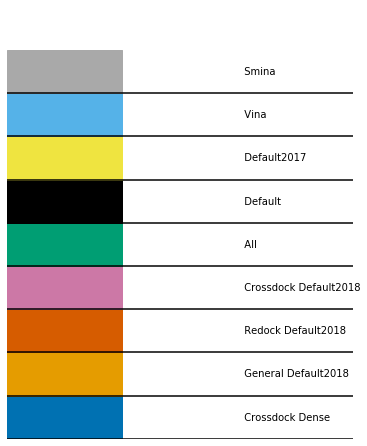

In [216]:
import matplotlib.patches as mpatch
color_dict = {'Crossdock Dense':'#0071b2','General Default2018':'#e59c00',
              'Redock Default2018':'#d65c00','Crossdock Default2018': '#cc78a6',
               'All':'#009e73','Default':'#000000',
               'Default2017':'#efe440','Vina':'#55b2e8','Smina':'#A9A9A9'
              }
fig = plt.figure(figsize=[4.8, 6])
ax = fig.add_axes([0, 0, 1, 1])
for j, (name, c) in enumerate(color_dict.items()):
    weight = None

    r1 = mpatch.Rectangle((0, j), 1, 1, color=c)
    txt = ax.text(2, j+.5, '  ' + name, va='center', fontsize=10,
                  weight=weight)
    ax.add_patch(r1)
    ax.axhline(j, color='k')

ax.set_xlim(0, 3)
ax.set_ylim(0, j + 2)
ax.axis('off')

### Prettify Stuff
All of this is for bar graphs, if we are doing them

In [217]:
use_pose=[1,3]
annotate_size=4
width=1
xlim=1

#### Get y-limit of the two graphs

In [218]:
def get_ylim(all_data):
    ylim=[100,0]
    for data in all_data:
        minimum_data = data.min().min()
        maximum_data = data.max().max()
        if minimum_data < ylim[0]:
            ylim[0] = minimum_data
        if maximum_data > ylim[1]:
            ylim[1] = maximum_data
    ylim[0] = np.floor(ylim[0])
    ylim[1] = np.ceil(ylim[1])
    return ylim

## For non sweep figures

In [219]:
def get_linestyle(column_name):
    if 'Ensemble' in column_name:
        linestyle = '-'
    elif 'Vina' == column_name:
        linestyle = (0, (3, 1, 1, 1))
    else:
        linestyle = '--'
    return linestyle

In [220]:
def get_linewidth(column_name):
    if 'Vina' == column_name:
        linewidth = 5
    elif 'Refine' in column_name:
        linewidth = 5
    else:
        linewidth = 2
    return linewidth

In [221]:
xlab='Top Number of Poses'
ylab =r'Percent Systems with RMSD$<2\,\AA$(Cumulative)'
xlim=1

### Compare Rescore to Refine

In [222]:
filename='rescore_vs_refine.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])

rescore_vs_refine_line


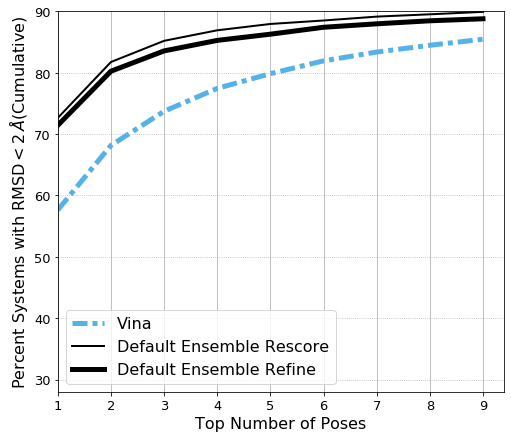

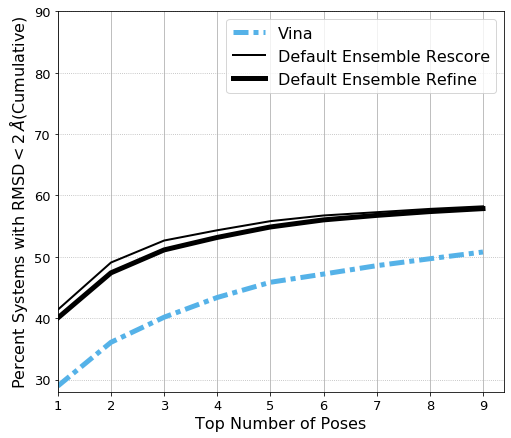

In [223]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        lw = get_linewidth(col)
        c = color_dict[col.replace(' Ensemble','').replace(' Rescore','').replace(' Refine','')]
        p = plt.plot(rang, big_df[col], label=col,c=c,linestyle=ls,linewidth=lw)
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0], ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [224]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

### First single models

In [225]:
filename='rescore_single_models.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])

rescore_single_models_line


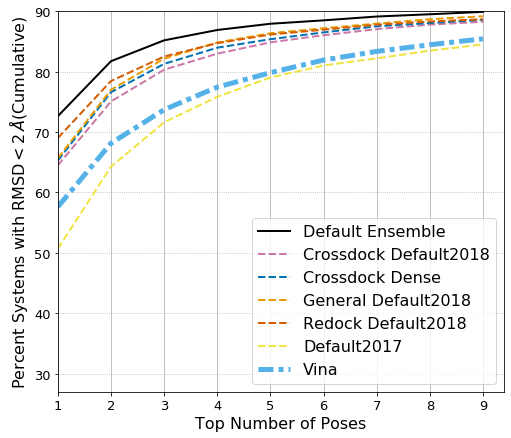

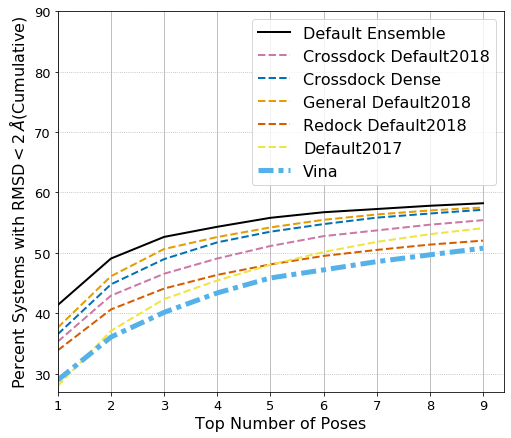

In [226]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        lw = get_linewidth(col)
        c = color_dict[col.replace(' Ensemble','')]
        p = plt.plot(rang, big_df[col], label=col,c=c,linestyle=ls,linewidth=lw)
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0], ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [227]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

### Ensemble models

In [228]:
filename='rescore_ensembles.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])

rescore_ensembles_line


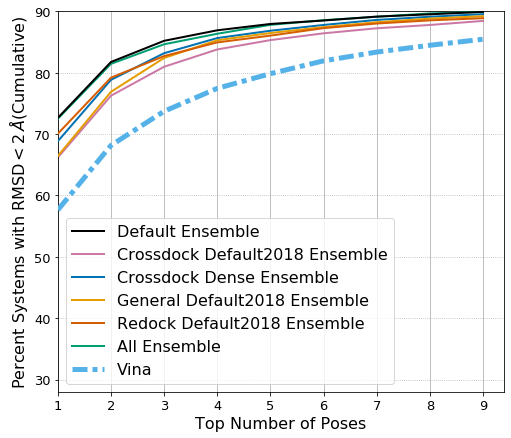

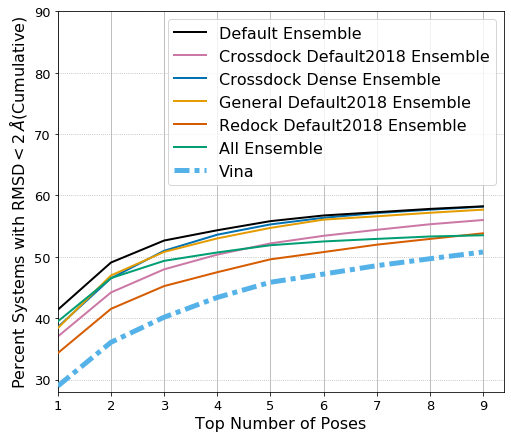

In [229]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for i,col in enumerate(big_df.columns):
        if 'Default Ensemble' in col:
            zorder = 10
        else:
            zorder = i+1
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        lw = get_linewidth(col)
        c = color_dict[col.replace(' Ensemble','')]
        p = plt.plot(rang, big_df[col], label=col,c=c,linestyle=ls,linewidth=lw,zorder=zorder)
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0], ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [230]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

### Time Split Single Models - No PDBbind2017 General

In [231]:
filename='single_models_no2017.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])

single_models_no2017_line


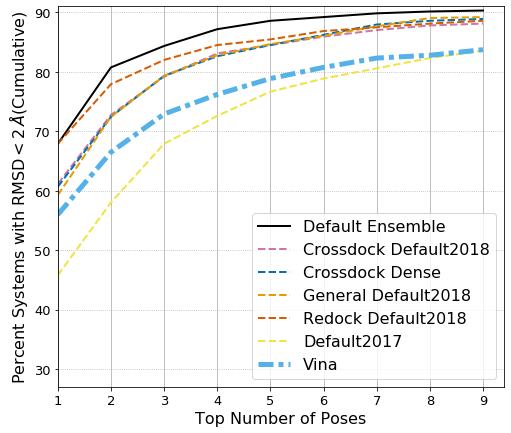

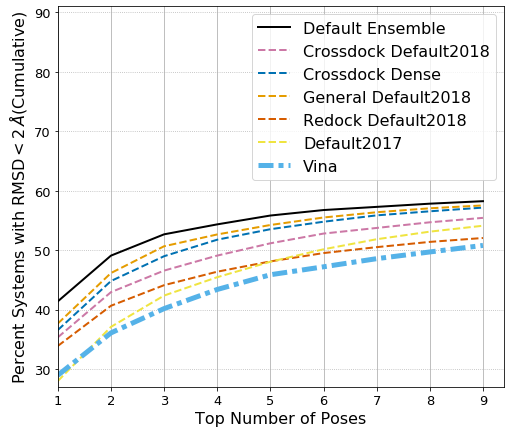

In [232]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        lw = get_linewidth(col)
        c = color_dict[col.replace(' Ensemble','')]
        p = plt.plot(rang, big_df[col], label=col,c=c,linestyle=ls,linewidth=lw)
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0], ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [233]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

### Time Split Ensemble Models - No PDBbind2017 General

In [234]:
filename='ensemble_models_no2017.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])

ensemble_models_no2017_line


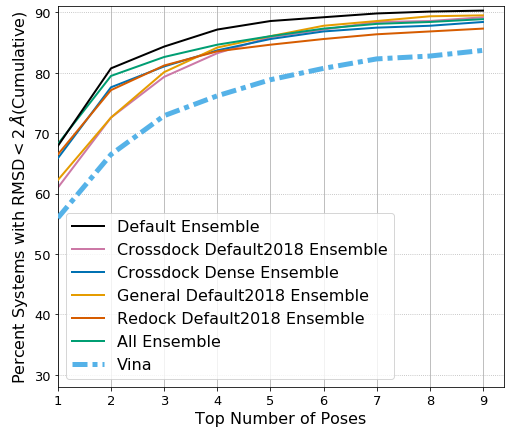

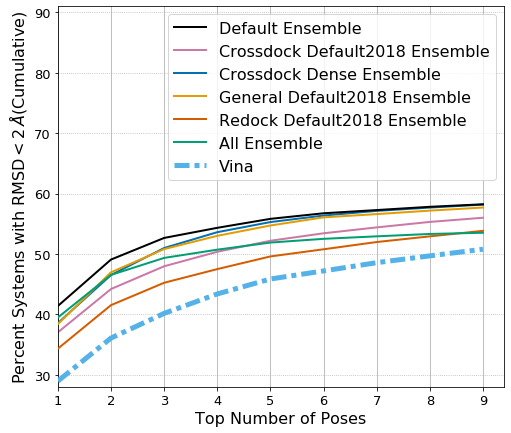

In [235]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for i,col in enumerate(big_df.columns):
        if 'Default Ensemble' in col:
            zorder = 10
        else:
            zorder = i+1
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        lw = get_linewidth(col)
        c = color_dict[col.replace(' Ensemble','')]
        p = plt.plot(rang, big_df[col], label=col,c=c,linestyle=ls,linewidth=lw,zorder=zorder)
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0], ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [236]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

### Time Split Single Models - No PDBbind2017 General and No CD2020

In [237]:
filename='single_models_no2017_nocd2020.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])

single_models_no2017_nocd2020_line


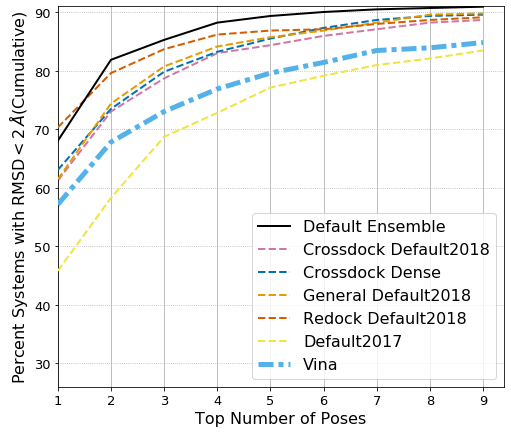

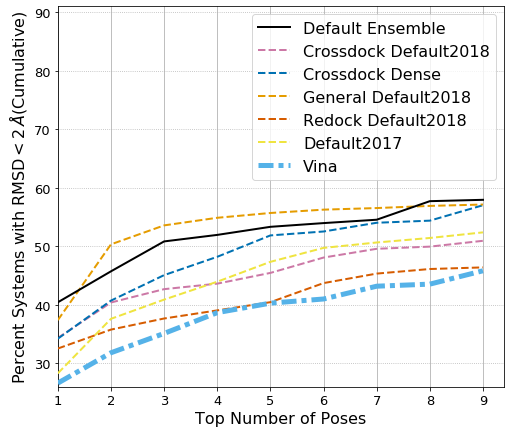

In [238]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for i,col in enumerate(big_df.columns):
        if 'Default Ensemble' in col:
            zorder = 10
        else:
            zorder = i+1
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        lw = get_linewidth(col)
        c = color_dict[col.replace(' Ensemble','')]
        p = plt.plot(rang, big_df[col], label=col,c=c,linestyle=ls,linewidth=lw,zorder=zorder)
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0], ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [239]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

### Time Split Ensemble Models - No PDBbind2017 General and No CD2020

In [240]:
filename='ensemble_models_no2017_nocd2020.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])

ensemble_models_no2017_nocd2020_line


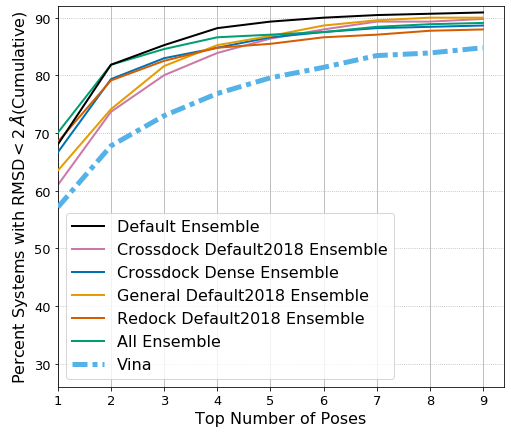

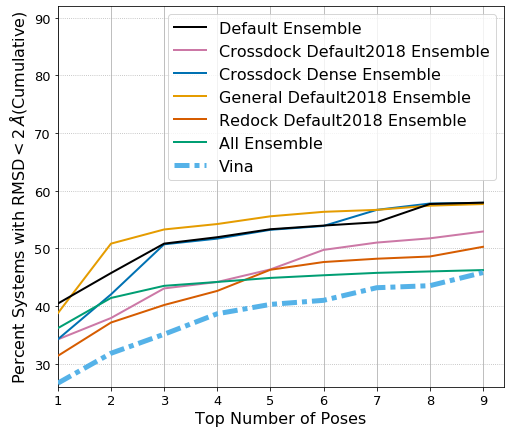

In [241]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for i,col in enumerate(big_df.columns):
        if 'Default Ensemble' in col:
            zorder = 10
        else:
            zorder = i+1
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        lw = get_linewidth(col)
        c = color_dict[col.replace(' Ensemble','')]
        p = plt.plot(rang, big_df[col], label=col,c=c,linestyle=ls,linewidth=lw,zorder=zorder)
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0], ylim[1]+1)
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [242]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

### Refinement Results - Single Models

In [243]:
filename='refine_single_models.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
#plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd])

refine_single_models_line


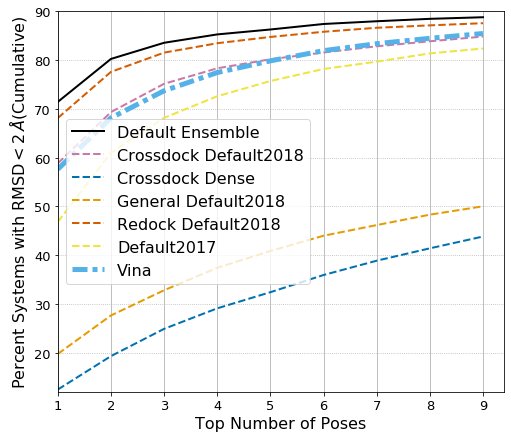

In [244]:
for big_df,data_type in [(plot_df_rd,'redocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        lw = get_linewidth(col)
        c = color_dict[col.replace(' Ensemble','')]
        p = plt.plot(rang, big_df[col], label=col,c=c,linestyle=ls,linewidth=lw)
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0], ylim[1]+1)
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [245]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')

### Refinement Results - Ensemble Models

In [246]:
filename='refine_ensembles.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd])

refine_ensembles_line


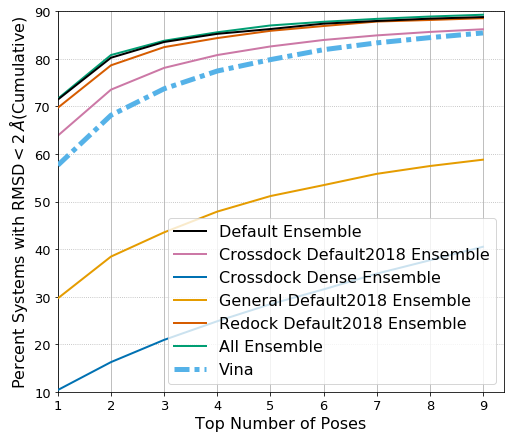

In [247]:
for big_df,data_type in [(plot_df_rd,'redocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for i,col in enumerate(big_df.columns):
        if 'Default Ensemble' in col:
            zorder = 10
        else:
            zorder = i+1
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        lw = get_linewidth(col)
        c = color_dict[col.replace(' Ensemble','')]
        p = plt.plot(rang, big_df[col], label=col,c=c,linestyle=ls,linewidth=lw,zorder=zorder)
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0], ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [248]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')

### Whole Protein (Default Ensemble vs Vina)
Need CD results for Vina- Paul is working on this

In [249]:
filename='whole_ptn_comparison.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])

whole_ptn_comparison_line


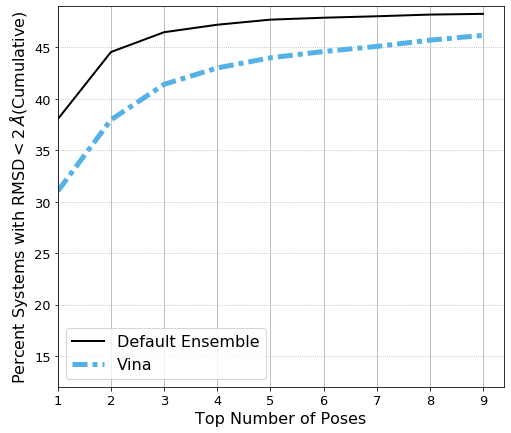

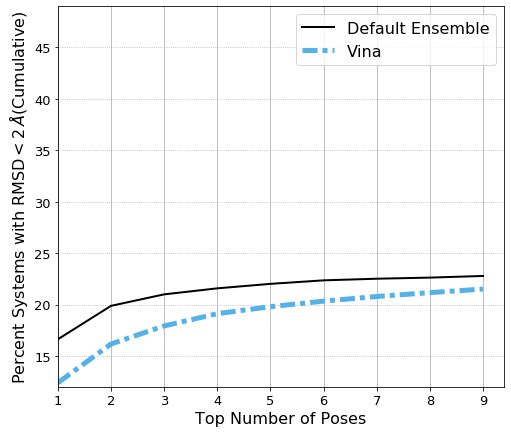

In [250]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        lw = get_linewidth(col)
        c = color_dict[col.replace(' Ensemble','')]
        p = plt.plot(rang, big_df[col], label=col,c=c,linestyle=ls,linewidth=lw)
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0], ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [251]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

# Thresholding Graphs
## CNNscore
### Single Models

In [252]:
filename='thresh_cnnscore_single_models.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]
print(figname)

thresh_cnnscore_single_models


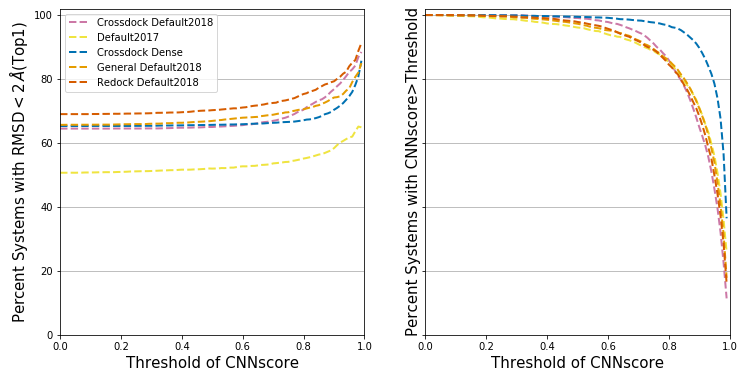

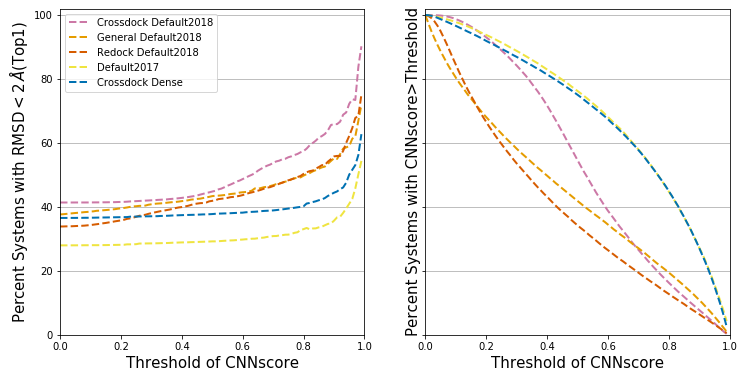

In [253]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=[12,6],sharex=True,sharey=True)
    rang= list(big_df.index)
    for c in [col for col in big_df.columns if 'Good' in col]:
        model = c.replace(' Good','')
        c = color_dict[model.replace(' Ensemble','')]
        ls = get_linestyle(model)
        lw = get_linewidth(model)
        
        ax1.plot(rang,big_df[f'{model} Good'],label=model,color=c,linestyle=ls,linewidth=lw)
        ax2.plot(rang,big_df[f'{model} Left'],label=model,color=c,linestyle=ls,linewidth=lw)
    ax1.set_xlabel('Threshold of CNNscore',fontsize=15)
    ax2.set_xlabel('Threshold of CNNscore',fontsize=15)
    ax1.grid(b=True,axis='y',which='major')
    ax1.legend()
    ax1.set_xlim(0,1)
    ax1.set_ylim(0,102)
    ax1.set_ylabel(r'Percent Systems with RMSD$<2\,\AA$(Top1)',fontsize=15)
    ax2.set_ylabel('Percent Systems with CNNscore>Threshold',fontsize=15)
    # box = ax1.get_position()
    # ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # lgd = plt.legend(handles=legend_elements,loc='center left', bbox_to_anchor=(1.15, 0.5))
    #plt.ylim(60,100)
    ax2.grid(b=True,axis='y',which='major')
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [254]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

### CNNscore -Ensemble Models

In [255]:
filename='thresh_cnnscore_ensembles.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]
print(figname)

thresh_cnnscore_ensembles


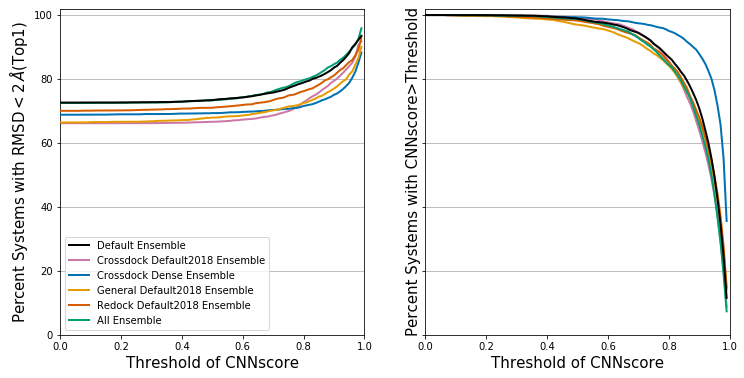

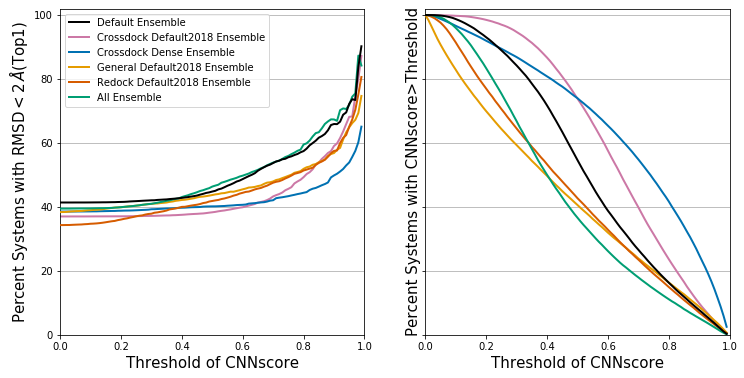

In [256]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=[12,6],sharex=True,sharey=True)
    rang= list(big_df.index)
    for i,c in enumerate([col for col in big_df.columns if 'Good' in col]):
        model = c.replace(' Good','')
        c = color_dict[model.replace(' Ensemble','')]
        ls = get_linestyle(model)
        lw = get_linewidth(model)
        if 'Default Ensemble' == model:
            zorder = 10
        else:
            zorder = i+1
        ax1.plot(rang,big_df[f'{model} Good'],label=model,color=c,linestyle=ls,linewidth=lw,zorder=zorder)
        ax2.plot(rang,big_df[f'{model} Left'],label=model,color=c,linestyle=ls,linewidth=lw,zorder=zorder)
    ax1.set_xlabel('Threshold of CNNscore',fontsize=15)
    ax2.set_xlabel('Threshold of CNNscore',fontsize=15)
    ax1.grid(b=True,axis='y',which='major')
    ax1.legend()
    ax1.set_xlim(0,1)
    ax1.set_ylim(0,102)
    ax1.set_ylabel(r'Percent Systems with RMSD$<2\,\AA$(Top1)',fontsize=15)
    ax2.set_ylabel('Percent Systems with CNNscore>Threshold',fontsize=15)
    # box = ax1.get_position()
    # ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # lgd = plt.legend(handles=legend_elements,loc='center left', bbox_to_anchor=(1.15, 0.5))
    #plt.ylim(60,100)
    ax2.grid(b=True,axis='y',which='major')
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [257]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

## CNNaffinity
### Single Models

In [258]:
filename='thresh_cnnaffinity_single_models.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]
print(figname)

thresh_cnnaffinity_single_models


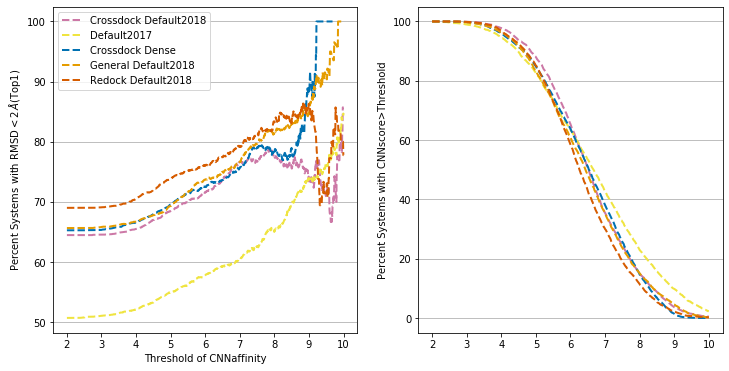

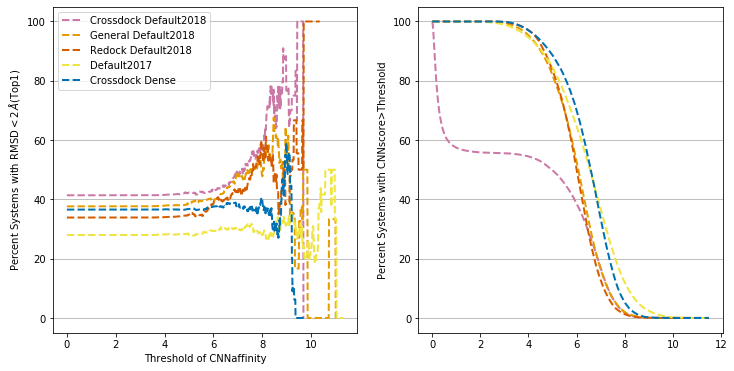

In [259]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=[12,6])
    rang= list(big_df.index)
    for c in [col for col in big_df.columns if 'Good' in col]:
        model = c.replace(' Good','')
        c = color_dict[model.replace(' Ensemble','')]
        ls = get_linestyle(model)
        lw = get_linewidth(model)
        
        ax1.plot(rang,big_df[f'{model} Good'],label=model,color=c,linestyle=ls,linewidth=lw)
        ax2.plot(rang,big_df[f'{model} Left'],label=model,color=c,linestyle=ls,linewidth=lw)
    ax1.set_xlabel('Threshold of CNNaffinity')
    ax1.grid(b=True,axis='y',which='major')
    ax1.legend()
    ax1.set_ylabel(r'Percent Systems with RMSD$<2\,\AA$(Top1)')
    ax2.set_ylabel('Percent Systems with CNNscore>Threshold')
    # box = ax1.get_position()
    # ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # lgd = plt.legend(handles=legend_elements,loc='center left', bbox_to_anchor=(1.15, 0.5))
    #plt.ylim(60,100)
    ax2.grid(b=True,axis='y',which='major')
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [260]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

### CNNaffinity -Ensemble Models

In [261]:
filename='thresh_cnnaffinity_ensembles.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]
print(figname)

thresh_cnnaffinity_ensembles


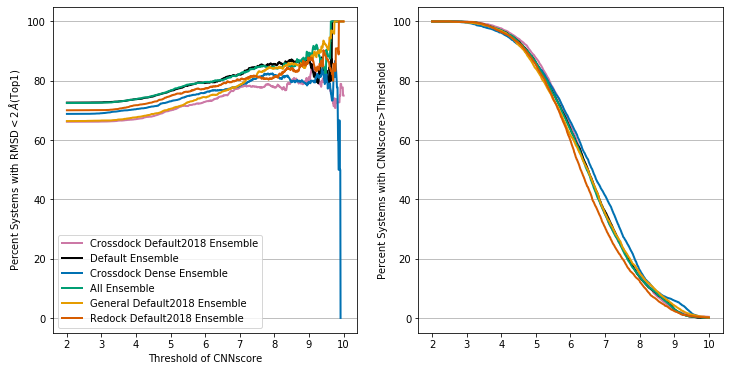

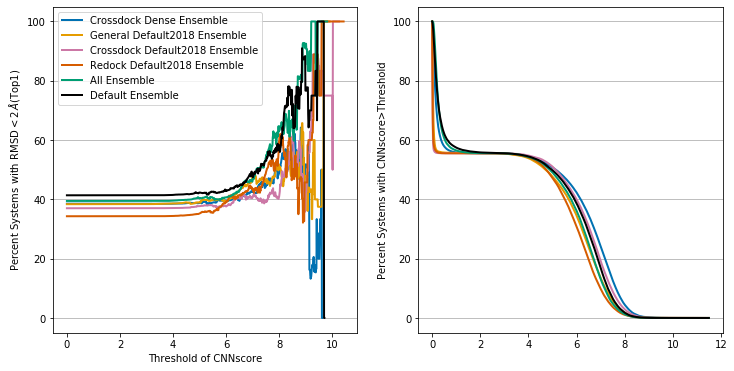

In [262]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=[12,6])
    rang= list(big_df.index)
    for c in [col for col in big_df.columns if 'Good' in col]:
        model = c.replace(' Good','')
        c = color_dict[model.replace(' Ensemble','')]
        ls = get_linestyle(model)
        lw = get_linewidth(model)
        
        ax1.plot(rang,big_df[f'{model} Good'],label=model,color=c,linestyle=ls,linewidth=lw)
        ax2.plot(rang,big_df[f'{model} Left'],label=model,color=c,linestyle=ls,linewidth=lw)
    ax1.set_xlabel('Threshold of CNNscore')
    ax1.grid(b=True,axis='y',which='major')
    ax1.legend()
    ax1.set_ylabel(r'Percent Systems with RMSD$<2\,\AA$(Top1)')
    ax2.set_ylabel('Percent Systems with CNNscore>Threshold')
    # box = ax1.get_position()
    # ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # lgd = plt.legend(handles=legend_elements,loc='center left', bbox_to_anchor=(1.15, 0.5))
    #plt.ylim(60,100)
    ax2.grid(b=True,axis='y',which='major')
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [263]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

# Benchmark Graphs

In [264]:
marker_dict={'Ensemble':'x',
            '':'o',
            'EnsembleRefine':'^'}
lgd_elements = [Patch(facecolor=value, edgecolor=value,
                         label=key)  for key,value in color_dict.items() if key not in ['Smina','All','Default']]
lgd_elements += [Patch(facecolor=color_dict['Default'], edgecolor=color_dict['Default'], label='Default Ensemble'),
                Patch(facecolor=color_dict['All'], edgecolor=color_dict['All'], label='All Ensemble')]
lgd_elements += [Line2D([0], [0], marker='x', color='grey', label='Ensemble',
                          markerfacecolor='grey', markersize=15,linestyle='None'),
                 Line2D([0], [0], marker='o', color='grey', label='Single Model',
                          markerfacecolor='grey', markersize=15,linestyle='None')]
refine_elem = [Line2D([0], [0], marker='^', color='grey', label='Refinement',
                          markerfacecolor='grey', markersize=15,linestyle='None')]

In [265]:
filename='rescore_single_models.csv'
plot_df_rd_single =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd_single =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
filename='rescore_ensembles.csv'
plot_df_rd_ensemble =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd_ensemble =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
filename='rescore_vs_refine.csv'
plot_df_rd_ref =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd_ref =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
filename='gpu_models.csv'
plot_df_b =pd.read_csv(f'/home/anm329/GNINA-1.0/data/benchmark/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)

gpu_models_line


In [266]:
for idx, row in plot_df_b.iterrows():
    if row['model'] in plot_df_rd_single.columns:
        plot_df_b.at[idx,'rd_perf'] = plot_df_rd_single.iloc[0][row['model']]
        plot_df_b.at[idx,'cd_perf'] = plot_df_cd_single.iloc[0][row['model']]
    elif 'Refine' in row['model']:
        plot_df_b.at[idx,'rd_perf'] = plot_df_rd_ref.iloc[0][row['model']]
        plot_df_b.at[idx,'cd_perf'] = plot_df_cd_ref.iloc[0][row['model']]
    else:
        plot_df_b.at[idx,'rd_perf'] = plot_df_rd_ensemble.iloc[0][row['model']]
        plot_df_b.at[idx,'cd_perf'] = plot_df_cd_ensemble.iloc[0][row['model']]

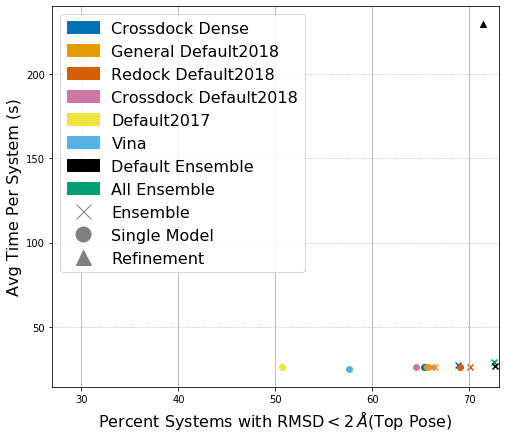

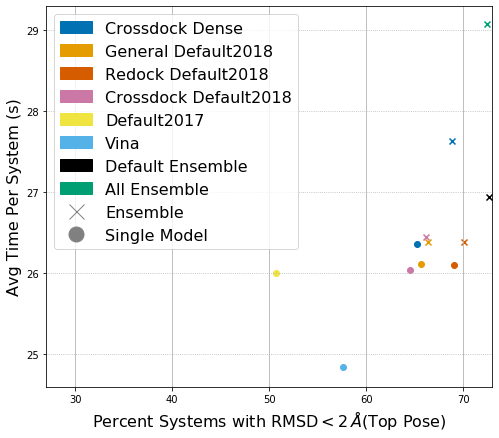

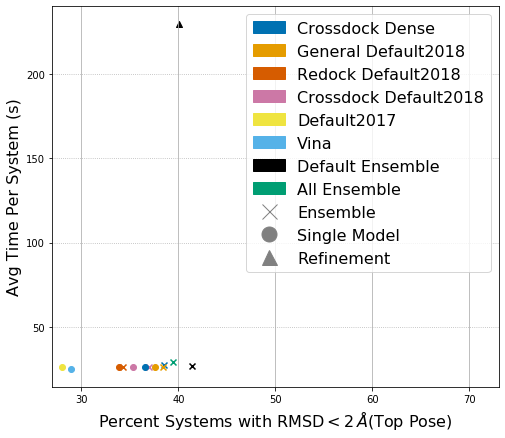

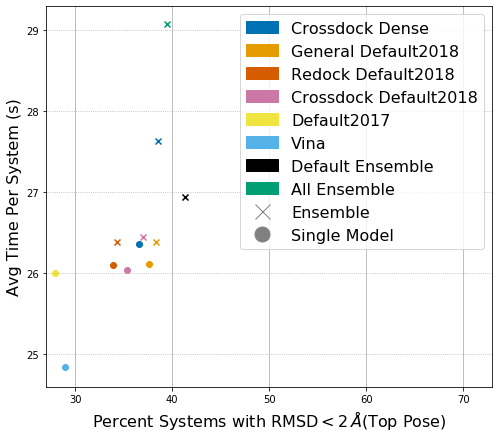

In [267]:
xlim = (np.floor(min(plot_df_b['rd_perf'].values.tolist()+plot_df_b['cd_perf'].values.tolist())),
            np.ceil(max(plot_df_b['rd_perf'].values.tolist()+plot_df_b['cd_perf'].values.tolist())))
for data_type in [('redocking','rd_perf'),('crossdocking','cd_perf')]:
    for cnn_types in ['all','rescore']:
        plot_elements = lgd_elements
        if cnn_types == 'all':
            plot_elements = lgd_elements + refine_elem
        ax = plt.figure(figsize=[8,7]).gca()
        for idx,row in plot_df_b.iterrows():
            model = row['model']
            basename = model.replace(' Ensemble','')
            if 'Refine' in model:
                if cnn_types == 'all':
                    basename = model.replace(' Ensemble Refine', '')
                else:
                    continue
            markerstyle=marker_dict[model.replace(basename,"").replace(" ","")]
            c = color_dict[basename]
            plt.scatter(row[data_type[1]],row['mean'],c=c,marker=markerstyle)
        ax.set_xbound(xlim[0],xlim[1])
        ax.set_xlabel(r'Percent Systems with RMSD$<2\,\AA$(Top Pose)',fontsize=16)
        ax.set_ylabel('Avg Time Per System (s)',fontsize=16)
        plt.grid(axis='x')
        plt.grid(axis='y',linestyle=':')
        lgd = ax.legend(fontsize=16,handles=plot_elements)
        plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type[0]}/{figname}_{cnn_types}.png', dpi=300)

### No GPU

In [268]:
lgd_elements = [Patch(facecolor=value, edgecolor=value,
                         label=key)  for key,value in color_dict.items() if key not in ['Smina','All','Default']]
lgd_elements += [Patch(facecolor=color_dict['Default'], edgecolor=color_dict['Default'], label='Default Ensemble'),
                Patch(facecolor=color_dict['All'], edgecolor=color_dict['All'], label='All Ensemble')]
lgd_elements += [Line2D([0], [0], marker='x', color='grey', label='Ensemble',
                          markerfacecolor='grey', markersize=15,linestyle='None'),
                 Line2D([0], [0], marker='o', color='grey', label='Single Model',
                          markerfacecolor='grey', markersize=15,linestyle='None')]

In [269]:
filename='rescore_single_models.csv'
plot_df_rd_single =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd_single =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
filename='rescore_ensembles.csv'
plot_df_rd_ensemble =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd_ensemble =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
filename='nogpu_models.csv'
plot_df_b =pd.read_csv(f'/home/anm329/GNINA-1.0/data/benchmark/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)

nogpu_models_line


In [270]:
for idx, row in plot_df_b.iterrows():
    if row['model'] in plot_df_rd_single.columns:
        plot_df_b.at[idx,'rd_perf'] = plot_df_rd_single.iloc[0][row['model']]
        plot_df_b.at[idx,'cd_perf'] = plot_df_cd_single.iloc[0][row['model']]
    else:
        plot_df_b.at[idx,'rd_perf'] = plot_df_rd_ensemble.iloc[0][row['model']]
        plot_df_b.at[idx,'cd_perf'] = plot_df_cd_ensemble.iloc[0][row['model']]

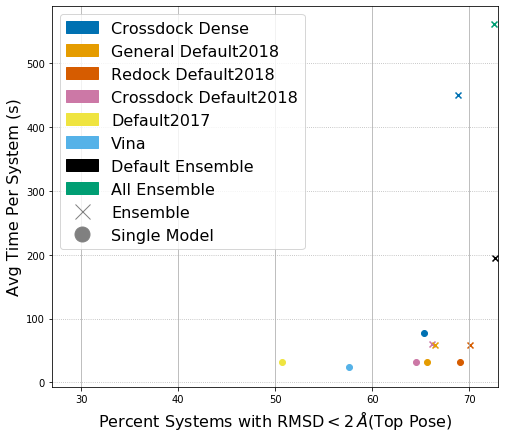

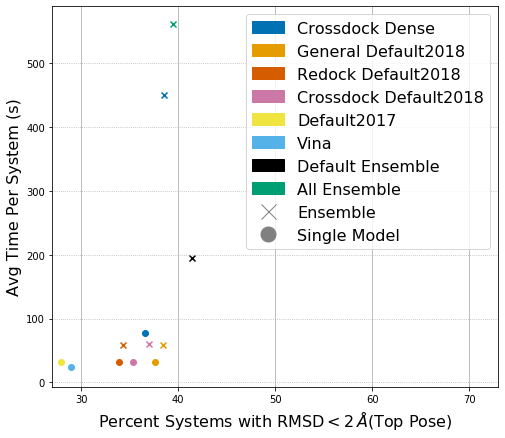

In [271]:
xlim = (np.floor(min(plot_df_b['rd_perf'].values.tolist()+plot_df_b['cd_perf'].values.tolist())),
            np.ceil(max(plot_df_b['rd_perf'].values.tolist()+plot_df_b['cd_perf'].values.tolist())))
for data_type in [('redocking','rd_perf'),('crossdocking','cd_perf')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for idx,row in plot_df_b.iterrows():
        model = row['model']
        basename = model.replace(' Ensemble','')
        markerstyle=marker_dict[model.replace(basename,"").replace(" ","")]
        c = color_dict[basename]
        plt.scatter(row[data_type[1]],row['mean'],c=c,marker=markerstyle)
    ax.set_xbound(xlim[0],xlim[1])
    ax.set_xlabel(r'Percent Systems with RMSD$<2\,\AA$(Top Pose)',fontsize=16)
    ax.set_ylabel('Avg Time Per System (s)',fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    lgd = ax.legend(fontsize=16,handles=lgd_elements)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type[0]}/{figname}.png', dpi=300)

# For Sweep Figures

In [272]:
xlim=1
def get_linestyle(column_name):
    if 'DefE' in column_name:
        linestyle = '-'
    elif 'Vina' in column_name:
        linestyle = (0, (3, 1, 1, 1))
    return linestyle

## Exhaustiveness

In [273]:
filename='sweep_exhaustiveness.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])
lgd_elements = [Patch(facecolor='b', edgecolor='b',
                         label='4'),
                   Patch(facecolor='k', edgecolor='k',
                         label='8 (Default)'),
                  Patch(facecolor='r', edgecolor='r',
                         label='16')]
color_dict = {'4':'b','8':'k',
              '16':'r'}

sweep_exhaustiveness_line


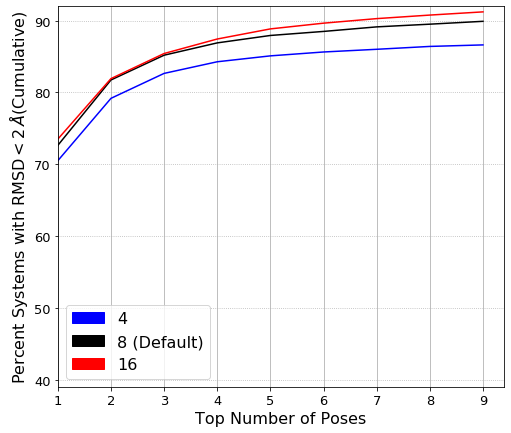

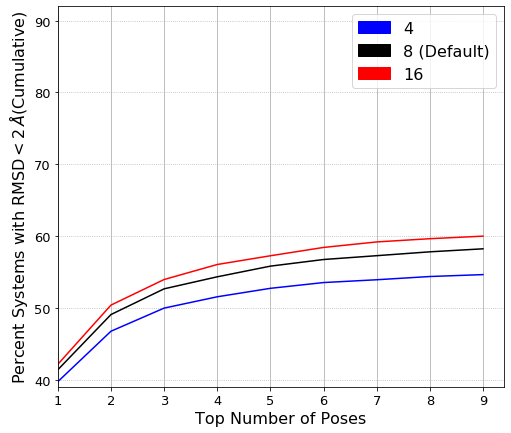

In [274]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for i,col in enumerate(big_df.columns):
        if 'DefE_8' in col:
            zorder = 10
        else:
            zorder = i+1
        #plot_df = list_of_dataframes[j]
        #rang = list_of_ranges[j]
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        if col.split('_')[1] not in ['4','8','16']:
            continue
        if col != 'Vina':
            c = color_dict[col.split('_')[1]]
            p = plt.plot(rang, big_df[col], label=col,c=c)
        else:
            c = color_dict[col.replace(' Ensemble','')]
            p = plt.plot(rang, big_df[col], label=col,linestyle=ls,c=c,linewidth=5,zorder=zorder)
    #     if args.use_bound:  # this adds shading to show the systems with dockings that are very "good" and less "good" (1 and 3 RMSD)
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good1'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good3'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0],ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16,handles=lgd_elements)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [275]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

## Autobox Add

In [276]:
filename='sweep_autobox_add.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])
lgd_elements = [Patch(facecolor='b', edgecolor='b',
                         label='2'),
                  Patch(facecolor='k', edgecolor='k',
                         label='4 (Default)'),
                  Patch(facecolor='r', edgecolor='r',
                         label='6'),
                  Patch(facecolor='g', edgecolor='g',
                         label='8')]
color_dict = {'2':'b','4':'k',
              '6':'r','8': 'g'}

sweep_autobox_add_line


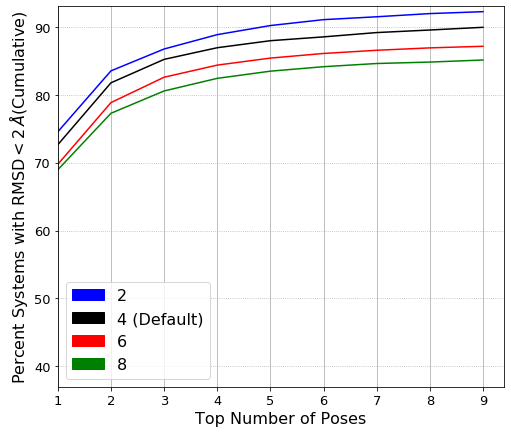

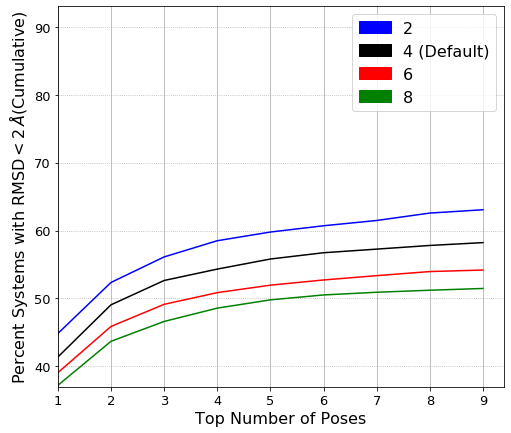

In [277]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        #plot_df = list_of_dataframes[j]
        #rang = list_of_ranges[j]
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        if col != 'Vina':
            c = color_dict[col.split('_')[1]]
            p = plt.plot(rang, big_df[col], label=col,c=c)
        else:
            c = color_dict[col.replace(' Ensemble','')]
            p = plt.plot(rang, big_df[col], label=col,linestyle=ls,c=c,linewidth=5)
    #     if args.use_bound:  # this adds shading to show the systems with dockings that are very "good" and less "good" (1 and 3 RMSD)
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good1'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good3'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0],ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16,handles=lgd_elements)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [278]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

## Number MC Saved

In [279]:
filename='sweep_mcsaved.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])
lgd_elements = [Patch(facecolor='b', edgecolor='b',
                         label='20'),
                  Patch(facecolor='r', edgecolor='r',
                         label='40'),
                  Patch(facecolor='k', edgecolor='k',
                         label='50 (Default)'),
                  Patch(facecolor='g', edgecolor='g',
                         label='60'),
                  Patch(facecolor='m', edgecolor='m',
                         label='80'),
                  Patch(facecolor='orange', edgecolor='orange',
                         label='100')]
color_dict = {'20':'b','40':'r','60':'g','80': 'm','100':'orange','Default':'k'}

sweep_mcsaved_line


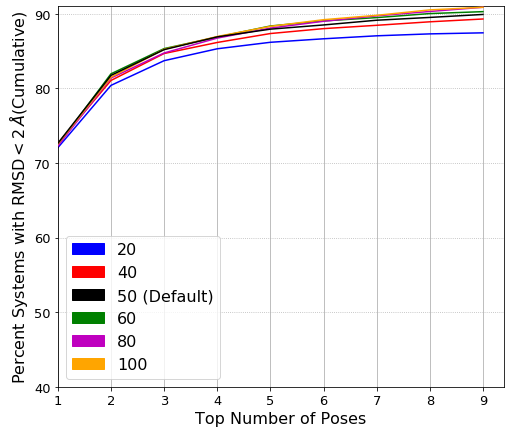

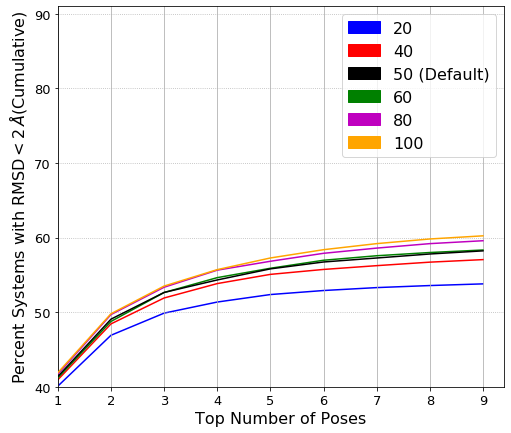

In [280]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for i,col in enumerate(big_df.columns):
        if 'DefE_Default' == col:
            zorder = 7
        else:
            zorder = i + 1
        #plot_df = list_of_dataframes[j]
        #rang = list_of_ranges[j]
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        if col != 'Vina':
            c = color_dict[col.split('_')[1]]
            p = plt.plot(rang, big_df[col], label=col,c=c,zorder=zorder)
        else:
            c = color_dict[col.replace(' Ensemble','')]
            p = plt.plot(rang, big_df[col], label=col,linestyle=ls,c=c,linewidth=5,zorder=zorder)
    #     if args.use_bound:  # this adds shading to show the systems with dockings that are very "good" and less "good" (1 and 3 RMSD)
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good1'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good3'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0],ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16,handles=lgd_elements)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [281]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

## CNN Rotations

In [282]:
filename='sweep_cnnrot.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])
lgd_elements = [Patch(facecolor='k', edgecolor='k',
                         label='0 (Default)'),
                  Patch(facecolor='b', edgecolor='b',
                         label='1'),
                  Patch(facecolor='g', edgecolor='g',
                         label='5'),
                  Patch(facecolor='r', edgecolor='r',
                         label='10'),
                  Patch(facecolor='m', edgecolor='m',
                         label='20')]
color_dict = {'0':'k','1':'b',
              '5':'g','10': 'r','20':'m'}

sweep_cnnrot_line


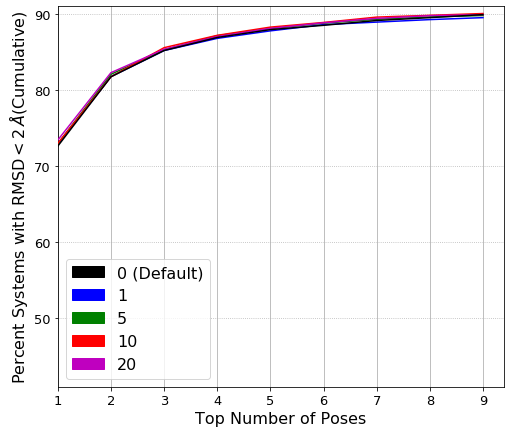

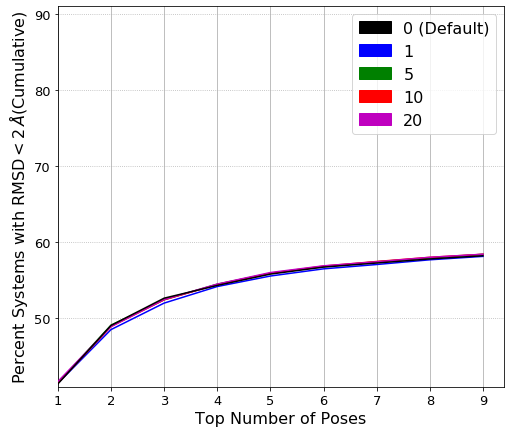

In [283]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for i,col in enumerate(big_df.columns):
        if 'DefE_0' == col:
            zorder=7
        else:
            zorder=i+1
        #plot_df = list_of_dataframes[j]
        #rang = list_of_ranges[j]
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        if col != 'Vina':
            c = color_dict[col.split('_')[1]]
            p = plt.plot(rang, big_df[col], label=col,c=c,zorder=zorder)
        else:
            c = color_dict[col.replace(' Ensemble','')]
            p = plt.plot(rang, big_df[col], label=col,linestyle=ls,c=c,linewidth=5,zorder=zorder)
    #     if args.use_bound:  # this adds shading to show the systems with dockings that are very "good" and less "good" (1 and 3 RMSD)
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good1'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good3'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0],ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16,handles=lgd_elements)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [284]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

## Number of Modes

In [285]:
filename='sweep_num_modes.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])
lgd_elements = [Patch(facecolor='k', edgecolor='k',
                         label='9 (Default)'),
                  Patch(facecolor='b', edgecolor='b',
                         label='100')]
color_dict = {'9':'k','100':'b'}

sweep_num_modes_line


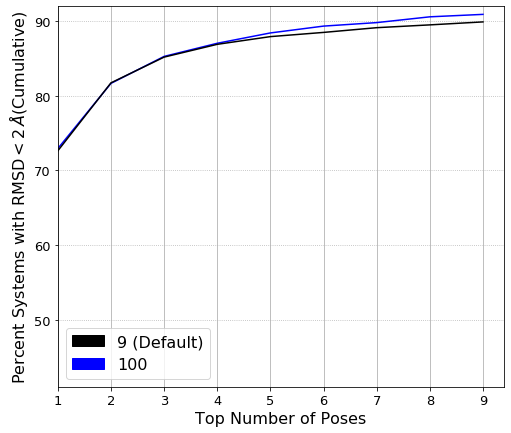

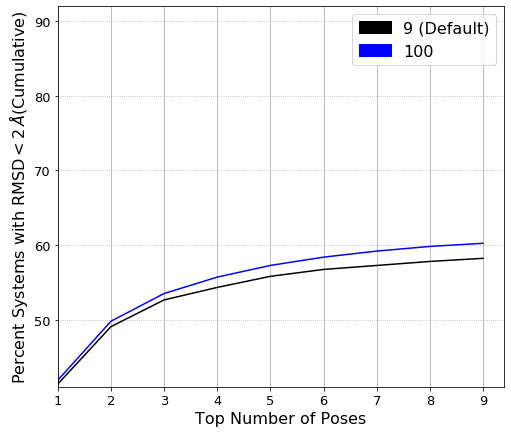

In [286]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for i,col in enumerate(big_df.columns):
        if 'DefE_9' == col:
            zorder=3
        else:
            zorder=i+1
        #plot_df = list_of_dataframes[j]
        #rang = list_of_ranges[j]
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        if col != 'Vina':
            c = color_dict[col.split('_')[1]]
            p = plt.plot(rang, big_df[col], label=col,c=c,zorder=zorder)
        else:
            c = color_dict[col.replace(' Ensemble','')]
            p = plt.plot(rang, big_df[col], label=col,linestyle=ls,c=c,linewidth=5,zorder=zorder)
    #     if args.use_bound:  # this adds shading to show the systems with dockings that are very "good" and less "good" (1 and 3 RMSD)
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good1'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good3'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0],ylim[1]+1)
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16,handles=lgd_elements)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [287]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

## Minimum RMSD Filter

In [288]:
filename='sweep_rmsdf.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])
lgd_elements = [Patch(facecolor='b', edgecolor='b',
                         label='0.5'),
                  Patch(facecolor='k', edgecolor='k',
                         label='1.0 (Default)'),
                  Patch(facecolor='r', edgecolor='r',
                         label='1.5')]
color_dict = {'0.5':'b','1.0':'k','1.5':'r'}

sweep_rmsdf_line


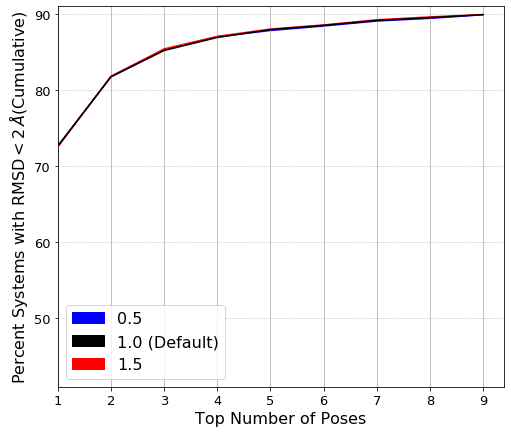

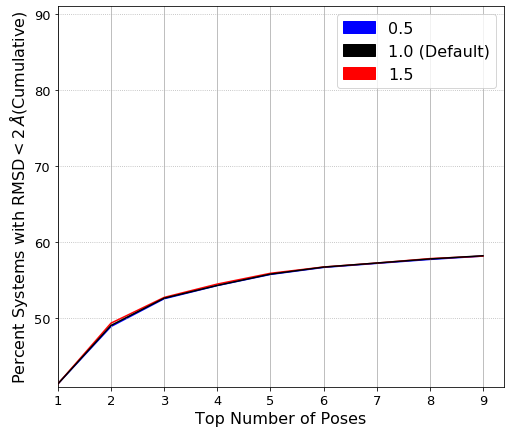

In [289]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for i,col in enumerate(big_df.columns):
        if 'DefE_1.0' == col:
            zorder=4
        else:
            zorder=i+1
        #plot_df = list_of_dataframes[j]
        #rang = list_of_ranges[j]
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        if col != 'Vina':
            c = color_dict[col.split('_')[1]]
            p = plt.plot(rang, big_df[col], label=col,c=c,zorder=zorder)
        else:
            c = color_dict[col.replace(' Ensemble','')]
            p = plt.plot(rang, big_df[col], label=col,linestyle=ls,c=c,linewidth=5,zorder=zorder)
    #     if args.use_bound:  # this adds shading to show the systems with dockings that are very "good" and less "good" (1 and 3 RMSD)
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good1'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good3'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0],ylim[1]+1)
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16,handles=lgd_elements)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [290]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

## Refinement with CNN Empirical Weight

In [291]:
filename='refine_sweep_cnn_empirical_weight.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])
lgd_elements = [Patch(facecolor='b', edgecolor='b',
                         label='0.01'),
                  Patch(facecolor='g', edgecolor='g',
                         label='0.1'),
                  Patch(facecolor='r', edgecolor='r',
                         label='1'),
                  Patch(facecolor='m', edgecolor='m',
                         label='10'),
                  Patch(facecolor='#55b2e8', edgecolor='#55b2e8',
                         label='Vina')]
color_dict = {'0.01':'b','0.1':'g','1':'r','10': 'm','Vina':'#55b2e8'}

refine_sweep_cnn_empirical_weight_line


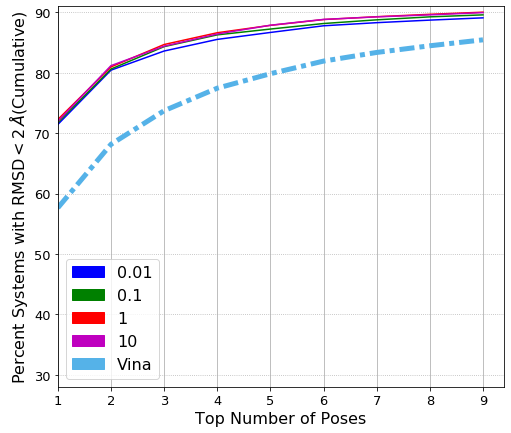

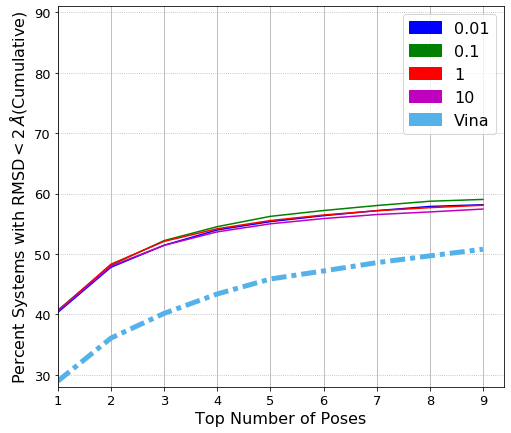

In [292]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        #plot_df = list_of_dataframes[j]
        #rang = list_of_ranges[j]
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        if col != 'Vina':
            c = color_dict[col.split('_')[1]]
            p = plt.plot(rang, big_df[col], label=col,c=c)
        else:
            c = color_dict[col.replace(' Ensemble','')]
            p = plt.plot(rang, big_df[col], label=col,linestyle=ls,c=c,linewidth=5)
    #     if args.use_bound:  # this adds shading to show the systems with dockings that are very "good" and less "good" (1 and 3 RMSD)
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good1'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good3'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0],ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16,handles=lgd_elements)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [293]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

## Whole Protein Exhaustiveness

In [294]:
filename='whole_ptn_sweep_exhaustiveness.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])
lgd_elements = [Patch(facecolor='k', edgecolor='k',
                         label='8 (Default)'),
                  Patch(facecolor='b', edgecolor='b',
                         label='16'),
                  Patch(facecolor='r', edgecolor='r',
                         label='32'),
                  Patch(facecolor='g', edgecolor='g',
                         label='64')]
color_dict = {'8':'k','16':'b','32':'r','64': 'g'}

whole_ptn_sweep_exhaustiveness_line


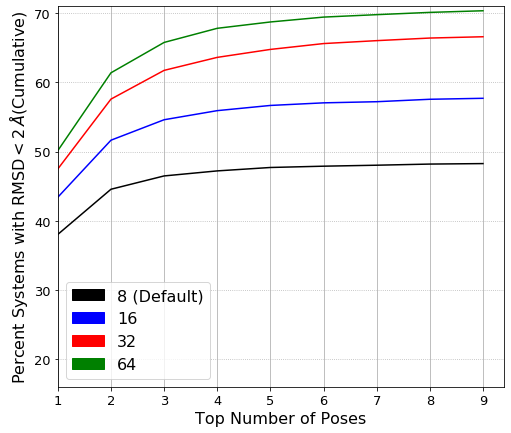

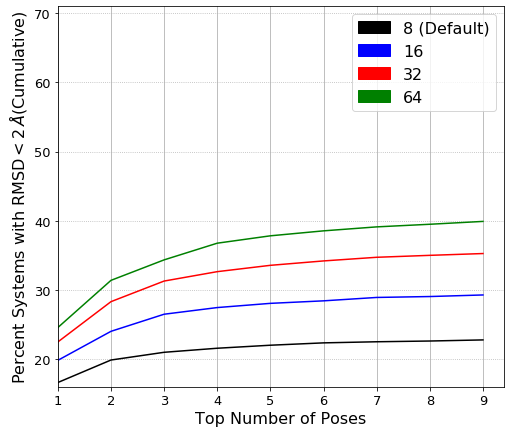

In [295]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        #plot_df = list_of_dataframes[j]
        #rang = list_of_ranges[j]
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        if col != 'Vina':
            c = color_dict[col.split('_')[1]]
            p = plt.plot(rang, big_df[col], label=col,c=c)
        else:
            c = color_dict[col.replace(' Ensemble','')]
            p = plt.plot(rang, big_df[col], label=col,linestyle=ls,c=c,linewidth=5)
    #     if args.use_bound:  # this adds shading to show the systems with dockings that are very "good" and less "good" (1 and 3 RMSD)
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good1'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good3'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    ax.set_xlim(left=xlim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0],ylim[1])
    ax.set_xlabel(xlab,fontsize=16)
    ax.set_ylabel(ylab,fontsize=16)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16,handles=lgd_elements)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.png', dpi=300)

In [296]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

## Bar Graph
Not Being used yet

In [297]:
# xlab = 'Pose Number'
# ylab = 'Percent Systems with RMSD<2(Cumulative)'
# figname=args.figname+'_bar'
# print(figname)
# args.annotate_size = 6
# print(args.annotate_size)

In [298]:
# ax = plt.figure(figsize=[8,7]).gca()
# offset = makeOffset(len(big_df.columns), args.width)
# for i,col in enumerate(big_df.columns):
#     #plot_df = list_of_dataframes[j]
#     bar_info = [big_df[col].iat[p] for p in args.use_pose]
# #     yerr = np.zeros(shape=(2, len(args.use_pose)), dtype=float)
#     c = color_dict[col.split(' ')[0]]
# #     if args.use_bound:  # for showing error bars on the bars to denote the systems below 1 and 3 rmsd for - and + error respectively
# #         for p_idx, pose in enumerate(args.use_pose):
# #             yerr_pos = float(plot_df.iloc[pose-1]['good3'])-float(plot_df.iloc[pose-1]['good2']) 
# #             yerr_neg = float(plot_df.iloc[pose-1]['good2'])-float(plot_df.iloc[pose-1]['good1']) 
# #             yerr[p_idx,:] = [yerr_neg, yerr_pos]
# #     else:
# #         yerr = None
#     rects = ax.bar(np.array(args.use_pose)+offset[i], bar_info, args.width/len(big_df.columns), align='center', label=col, capsize=4,color=c)
#     if args.annotate_size:  # adding annotations to the bars to tell their exact values
#         autolabel(rects, args.annotate_size, ax)
# #prettifyGraph(ax, 'Pose #', 'Percent Good Poses (<2 RMSD)', args.figname+'_bar', bargraph=args.use_pose, ylim=args.y_lim)
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# ax.set_autoscalex_on(True)
# ax.set_xticks(args.use_pose)
# ax.set_autoscaley_on(True)
# ax.tick_params(axis='both', which='major', labelsize=13)
# ax.set_xlabel(xlab,fontsize='large')
# ax.set_ylabel(ylab,fontsize='large')
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.savefig(f'/home/anm329/GNINA-1.0/figures/{figname}.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')